# Importer les packages nécessaires

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Importer la base de données Iris

In [2]:
# Importation du data
data = pd.read_csv('Iris2.csv')
# Eliminer la colonnes des indices ajoutés par défaut
data.drop('Id',axis=1,inplace=True)
# Affichage de la taille du data
print(data.shape)
# Affichage de l'entête du data 
data.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Extraire les valeurs du data et les tracer

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

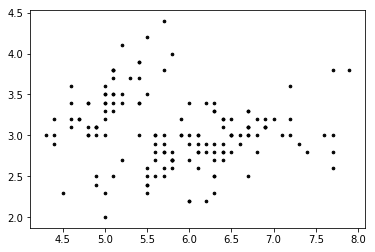

In [3]:
# Getting the values and plotting it
f1 = data['SepalLengthCm'].values
f2 = data['SepalWidthCm'].values
f3 = data['PetalLengthCm'].values
f4 = data['PetalWidthCm'].values
X = np.array(list(zip(f1, f2, f3, f4)))
print(X)
plt.scatter(f1, f2, c='black', s=7)

# Fonction pour calculer la distance euclidean

In [4]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Initialisation des variables

In [5]:
# Nombre de classes
k = 3
# Taille du matrice qui contient les valeurs du data
c = X.shape[1]
n = X.shape[0]
# Initialisation des k centres initiaux des k classes
C = np.random.randn(k,c)
for i in range(k):
    C[i]=X[np.random.randint(0,n-1)]
print(C)    

[[6.8 3.2 5.9 2.3]
 [5.7 4.4 1.5 0.4]
 [6.8 3.  5.5 2.1]]


# Tracer les centres initiaux

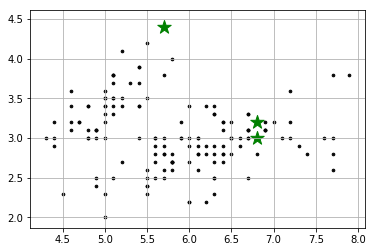

In [6]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='g')

plt.grid(True)
plt.show()

# Appliquer le kmeans

In [7]:
# Pour stocker les valeurs des centres qu'on ils sont modifiés
C_old = np.zeros(C.shape)
# Labels des classes(0, 1, 2)
clusters = np.zeros(len(X))
# Fonction d'erreur - La distance entre les nouveaux et les anciens centres
error = dist(C, C_old, None)
# Boucler jusqu'à ce que l'erreur devient zero
while error != 0:
    # Assigner chaque valeur à la classe la plus proche à elle
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Stocker l'ancienne valeur des centres
    C_old = deepcopy(C)
    # Trouver le nouveau centre en se basant sur la moyenne
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

# Affichage des centres finaux et les classes

In [8]:
print(C)
print(clusters)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 2. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0.
 0. 0. 2. 0. 0. 2.]


# Tracer les centres finaux avec leurs classes

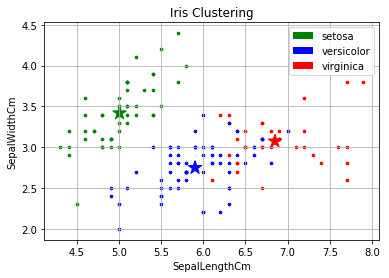

In [9]:
colors = ['r', 'g', 'b']
labels=['setosa','versicolor','virginica']
recs = []
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c=colors)

import matplotlib.patches as mpatches
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i-2]))
plt.legend(recs,labels,loc=1)
plt.grid(True)
plt.title('Iris Clustering')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()